# Overview

This code reads in data from the Tektronix TDS 2004C four channel digital scope.

This code assumes the following : 
* You have a subdirectory that is where you data is stored
* You save the data from the scope using the save button
    * This creates its own subdirectory with all the channels saved
* This works for two channels and can be extended to four
* It uses the pandas data analysis package  
* It creates a plot using matplotlib


If you have any thoughts and suggestions, please feel free to email me at brittanykamai@gmail.com or send me a message on github @cosmojellyfish

*Last updated by Brittany Kamai on 22 January 2020*

### Importing packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
sns.set()

### Setting up plot

In [57]:
# 1 : choose the pallet
# 2 : setup the plot information - size, label size,
# 3 : setup the font styles

sns.set_palette("husl", 8)

sns.set(rc={#"axes.facecolor":"#e6e6e6",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 20.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20})
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

### Defining a function to read in the data from channel

In [46]:
#-----------------------info for both functions-------------------------
# r = root, d = directory and f = files
# 1 : find files in the data directory
# 2 : find files within the os.walk function
# 3 : match the name of the file as with ch1
# 4 : read in the data into a dataframe
#   : note that these files have no headers
# 5 : rename each column name
# 6 : return datach1 dataframe

# Readin_ScopeData_ch1 and Readin_ScopeData_ch1 are the same functions
# Whenever I feel comfortable with classes then I will update this
#-----------------------------------------------------------------------


def Readin_ScopeData_ch1():
    for r,d,f in os.walk("../data/"):
        for files in f: 
            if "F0000CH1.csv" in files: 
                ch1path = (os.path.join(r, files))
                
    datach1 = pd.read_csv(ch1path,delimiter = ',',header=None) 
    datach1.columns = ["Settings", "Setting_Values","Empty","x", "y","Empty"] 
    
    return(datach1)
    
    
    
def Readin_ScopeData_ch2():    
    for r,d,f in os.walk("../data/"):
        for files in f:
            if "F0000CH2.csv" in files:
                ch2path = (os.path.join(r, files))                
    datach2 = pd.read_csv(ch2path,delimiter = ',',header=None)
    datach2.columns = ["Settings", "Setting_Values","Empty","x", "y","Empty"]
    return(datach2)

### Reading in Scope Data

In [59]:
ch1 = Readin_ScopeData_ch1()
ch2 = Readin_ScopeData_ch2()

### Settings information

* These datafiles have settings information saved in the first couple of columns
* These steps are to turn them into useful variables for later

In [60]:
ch1_y_scaling  = float(ch1.Setting_Values[8])
ch1_y_offset   = float(ch1.Setting_Values[9])
ch1_x_units    = ch1.Setting_Values[10]
ch1_x_scaling  = float(ch1.Setting_Values[11])    

ch2_y_scaling  = float(ch2.Setting_Values[8])
ch2_y_offset   = float(ch2.Setting_Values[9])
ch2_x_units    = ch2.Setting_Values[10]
ch2_x_scaling  = float(ch2.Setting_Values[11])

### Plotting with Matplotlib

Text(0.5, 0, 'Time [s]')

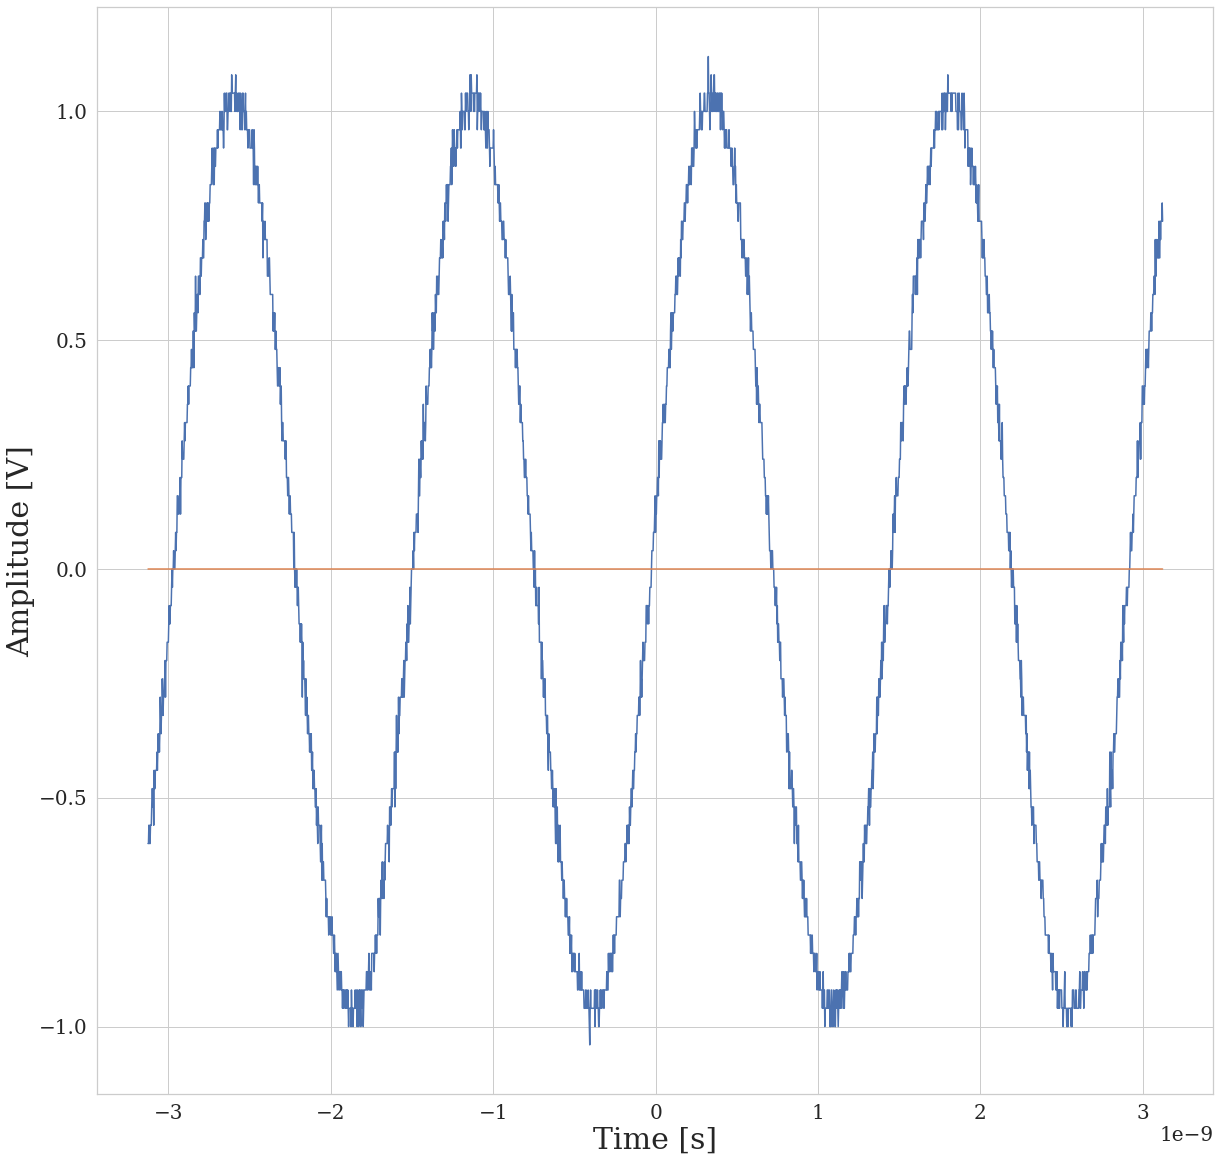

In [61]:
plt.plot(ch1.x*ch2_x_scaling,ch1.y*ch1_y_scaling)
plt.plot(ch2.x*ch2_x_scaling,ch2.y*ch2_y_scaling)
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [s]')